In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
hourly=pd.read_csv("hourly")
daily=pd.read_csv("daily")
weather_daily=pd.read_csv("weather_daily.csv")
weather_hourly=pd.read_csv("weather_hourly.csv")
daily["date"]=pd.to_datetime(daily["date"])
hourly["date"]=pd.to_datetime(hourly["date"])
param={"legend.fontsize":"x-large","axes.labelsize":"x-large","axes.titlesize":"x-large","figure.figsize":(15,5)}
plt.rcParams.update(param)

In [2]:
#The most important weather indicators are temperature and windspeed. Humidity exhibits effects in extreme low/high values
#Average humidity in DC is 64%, relatively stable throught the year
#Feels like temperature (also known as heat index), combines temperature with humidity, 
#so it is extremely correlated with temperature, we may drop it

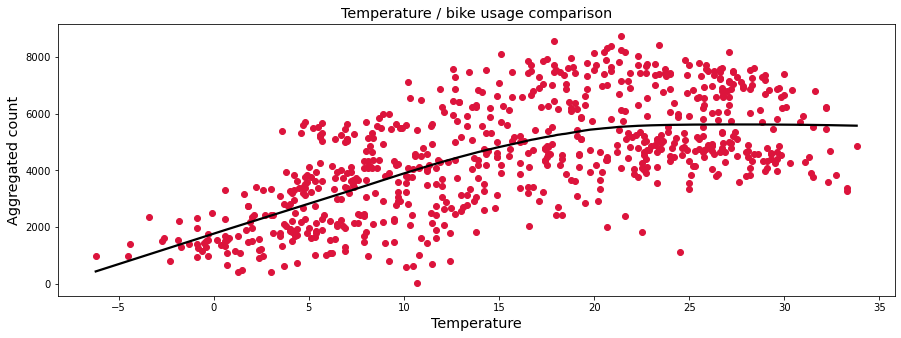

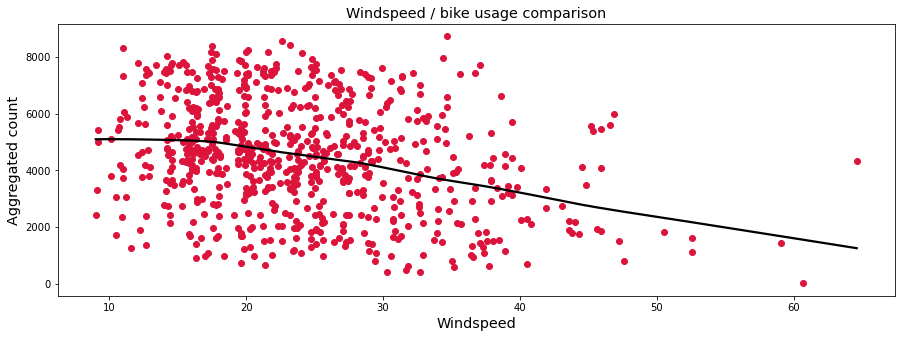

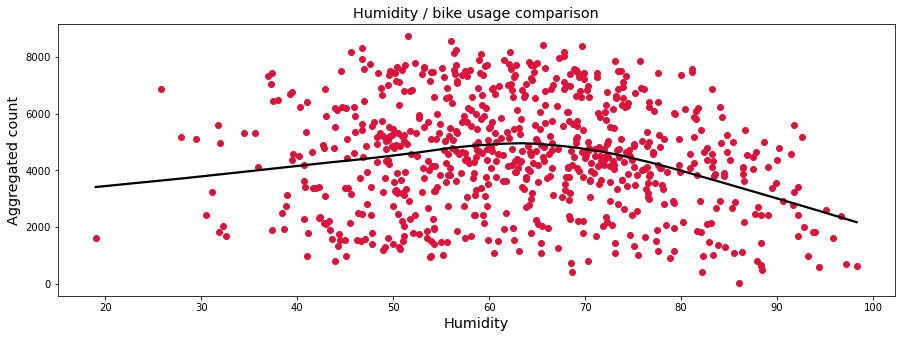

In [3]:
#Plots for presentation
#Temp-count
temp=plt.scatter(x=daily["temp"],y=daily["cnt"],color="crimson")
temp=sns.regplot(data=daily,x="temp",y="cnt",lowess=True,scatter=False,fit_reg=True,color="black")
plt.xlabel("Temperature")
plt.ylabel("Aggregated count")
plt.title("Temperature / bike usage comparison")
plt.show(temp)
#Windspeed-count
temp=plt.scatter(x=daily["windspeed"],y=daily["cnt"],color="crimson")
temp=sns.regplot(data=daily,x="windspeed",y="cnt",lowess=True,scatter=False,fit_reg=True,color="black")
plt.xlabel("Windspeed")
plt.ylabel("Aggregated count")
plt.title("Windspeed / bike usage comparison")
plt.show(temp)
#Humidity-count
temp=plt.scatter(x=daily["hum"],y=daily["cnt"],color="crimson")
temp=sns.regplot(data=daily,x="hum",y="cnt",lowess=True,scatter=False,fit_reg=True,color="black")
plt.xlabel("Humidity")
plt.ylabel("Aggregated count")
plt.title("Humidity / bike usage comparison")
plt.show(temp)

In [4]:
#During working days, the rental distribution is fairly consistent throught the seasonal changes
#Same consistency for holidays/weekends
#Most people prefer to ride a bike in warmer weather (obv)
#2012 was a better year for CBS, irrespective of any other factors

[Text(0.5, 1.0, 'Seasonal distribution of total rentals'),
 Text(0.5, 0, 'Hour of the day'),
 Text(0, 0.5, 'Rental count')]

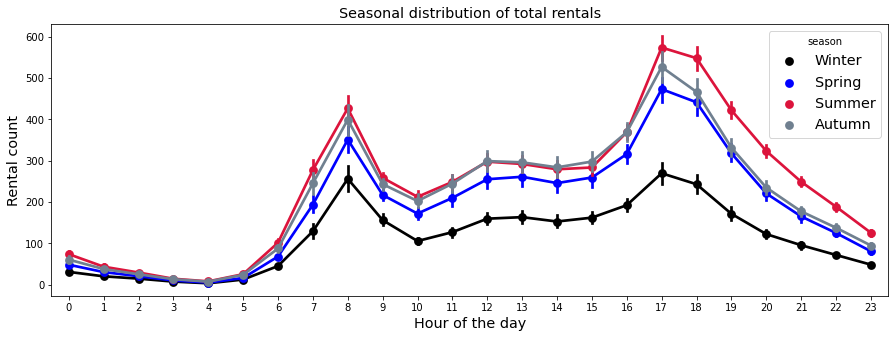

In [5]:
fig,ax=plt.subplots()
colours=["black","blue","crimson","slategrey"]
sns.set_palette(sns.color_palette(colours))
sns.pointplot(data=hourly,x="hour",y="cnt",hue="season")
ax.set(title="Seasonal distribution of total rentals",xlabel="Hour of the day",ylabel="Rental count")

[Text(0.5, 1.0, 'Daily distribution of total rentals'),
 Text(0.5, 0, 'Hour of the day'),
 Text(0, 0.5, 'Rental count')]

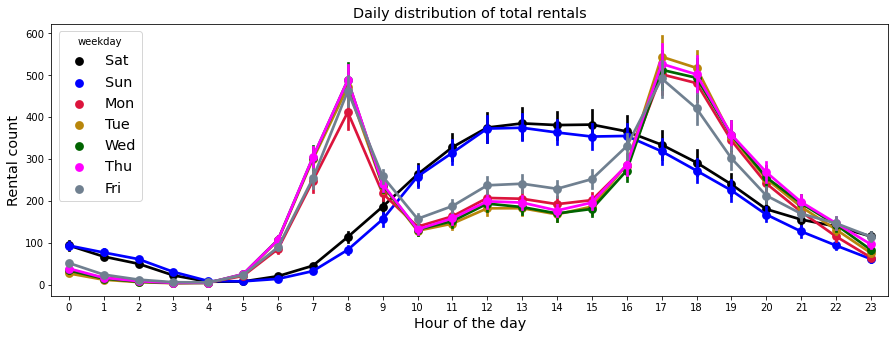

In [6]:
fig,ax=plt.subplots()
colours=["black","blue","crimson","darkgoldenrod","darkgreen","fuchsia","slategrey"]
sns.set_palette(sns.color_palette(colours))
sns.pointplot(data=hourly,x="hour",y="cnt",hue="weekday")
ax.set(title="Daily distribution of total rentals",xlabel="Hour of the day",ylabel="Rental count")

[Text(0.5, 1.0, 'Distribution of total rentals depending on holidays'),
 Text(0.5, 0, 'Hour of the day'),
 Text(0, 0.5, 'Rental count')]

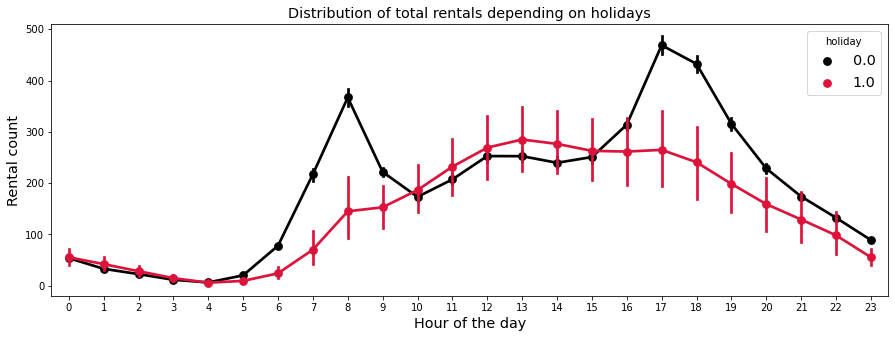

In [7]:
fig,ax=plt.subplots()
colours=["black","crimson"]
sns.set_palette(sns.color_palette(colours))
sns.pointplot(data=hourly,x="hour",y="cnt",hue="holiday")
ax.set(title="Distribution of total rentals depending on holidays",xlabel="Hour of the day",ylabel="Rental count")

[Text(0.5, 1.0, 'Non-registered users based on weather conditions'),
 Text(0.5, 0, 'Weather condition'),
 Text(0, 0.5, 'Rental count')]

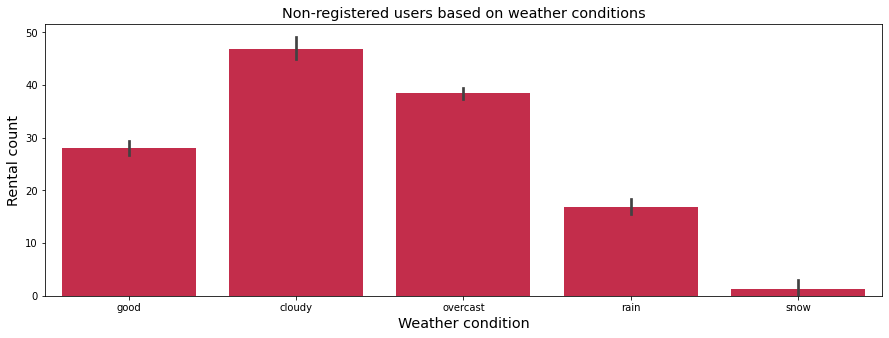

In [8]:
fig,ax=plt.subplots()
temp_labels=["good","cloudy","overcast","rain","snow"]
sns.barplot(data=hourly,x="weather",y="casual",order=temp_labels,color="crimson")
ax.set(title="Non-registered users based on weather conditions",xlabel="Weather condition",ylabel="Rental count")

[Text(0.5, 1.0, 'Registered users based on weather conditions'),
 Text(0.5, 0, 'Weather condition'),
 Text(0, 0.5, 'Rental count')]

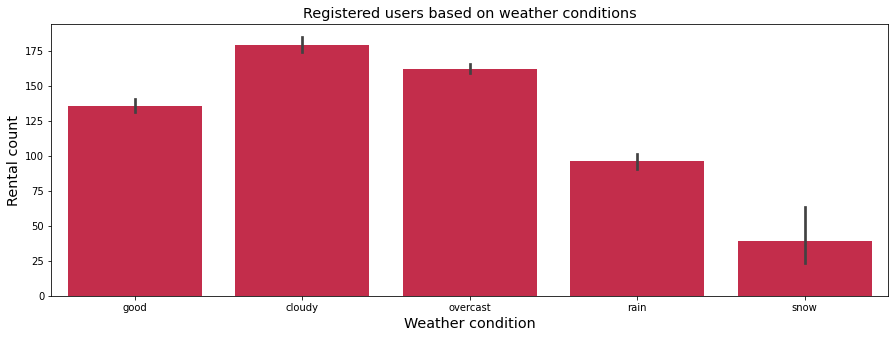

In [9]:
fig,ax=plt.subplots()
temp_labels=["good","cloudy","overcast","rain","snow"]
sns.barplot(data=hourly,x="weather",y="registered",order=temp_labels,color="crimson")
ax.set(title="Registered users based on weather conditions",xlabel="Weather condition",ylabel="Rental count")

[Text(0.5, 1.0, 'Total usage monthly distribution'),
 Text(0.5, 0, 'Month of the year'),
 Text(0, 0.5, 'Rental count')]

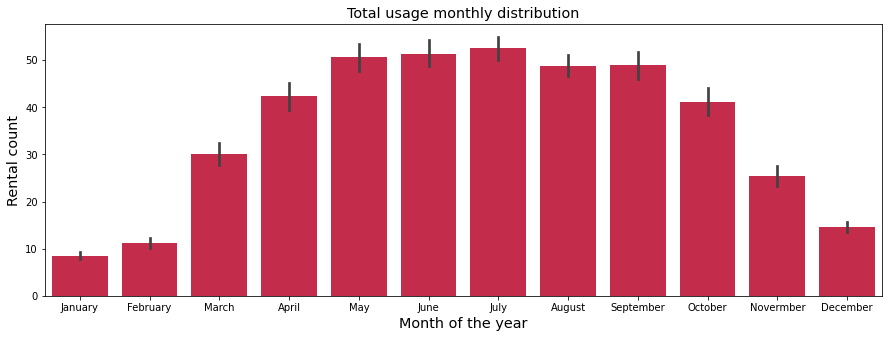

In [10]:
fig,ax=plt.subplots()
#order=["good","cloudy","overcast","rain","snow"]
sns.barplot(data=hourly,x="month",y="casual",color="crimson")
temp_labels=["January","February","March","April","May","June","July","August","September","October","Novermber","December"]
ax.set_xticklabels(temp_labels)
ax.set(title="Total usage monthly distribution",xlabel="Month of the year",ylabel="Rental count")

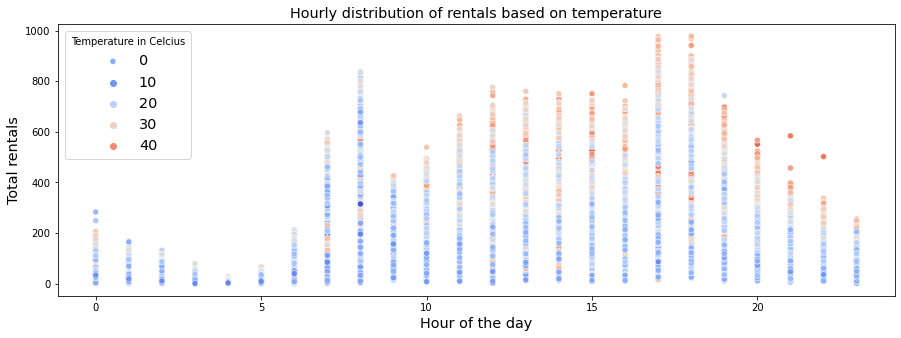

In [11]:
fig,ax=plt.subplots()
sns.scatterplot(data=hourly,x="hour",y="cnt",hue="temp",palette="coolwarm")
ax.set(title="Hourly distribution of rentals based on temperature",xlabel="Hour of the day",ylabel="Total rentals")
plt.legend(title="Temperature in Celcius", labels=[0,10,20,30,40])

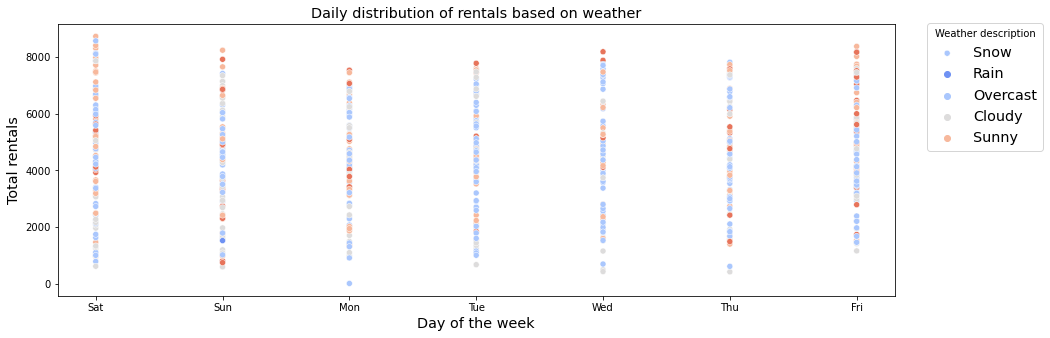

In [12]:
fig,ax=plt.subplots()
a=sns.scatterplot(x=daily["weekday"],y=daily["cnt"],hue=daily["weather"],palette="coolwarm",hue_order=("snow","rain","overcast","cloudy","good"))
ax.set(title="Daily distribution of rentals based on weather",xlabel="Day of the week",ylabel="Total rentals")
plt.legend(title="Weather description",labels=["Snow","Rain","Overcast","Cloudy","Sunny"],bbox_to_anchor=(1.03,1.03),loc=2)

[Text(0.5, 1.0, 'Yearly distribution of rentals'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Total rentals')]

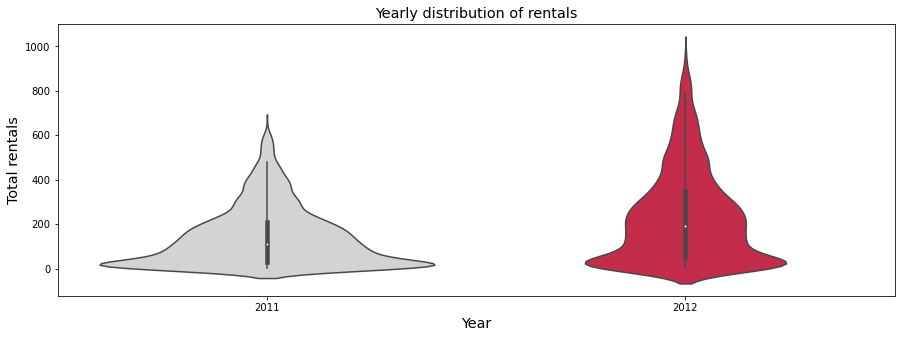

In [13]:
fig,ax=plt.subplots()
colours=["lightgrey","crimson"]
sns.set_palette(sns.color_palette(colours))
sns.violinplot(data=hourly,x="year",y="cnt")
ax.set(title="Yearly distribution of rentals",xlabel="Year",ylabel="Total rentals")

[Text(0.5, 0, 'Temperature'),
 Text(1.5, 0, 'Heat index'),
 Text(2.5, 0, 'Humidity'),
 Text(3.5, 0, 'Windspeed'),
 Text(4.5, 0, 'Casual'),
 Text(5.5, 0, 'Registered'),
 Text(6.5, 0, 'Total count')]

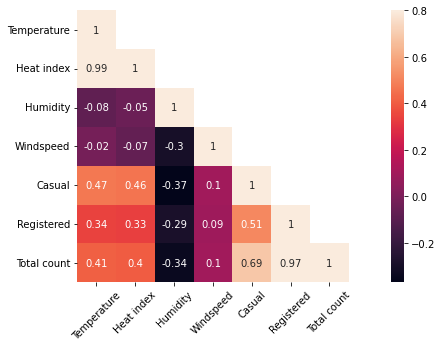

In [14]:
corr=hourly[["temp","ftemp","hum","windspeed","casual","registered","cnt"]].corr().round(2)
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
temp_labels=["Temperature","Heat index","Humidity","Windspeed","Casual","Registered","Total count"]
fig,ax=plt.subplots()
ax=sns.heatmap(corr,mask=mask,vmax=.8,square=True,annot=True,yticklabels=temp_labels)
ax.set_xticklabels(temp_labels,rotation=45)

<AxesSubplot:xlabel='day', ylabel='cnt'>

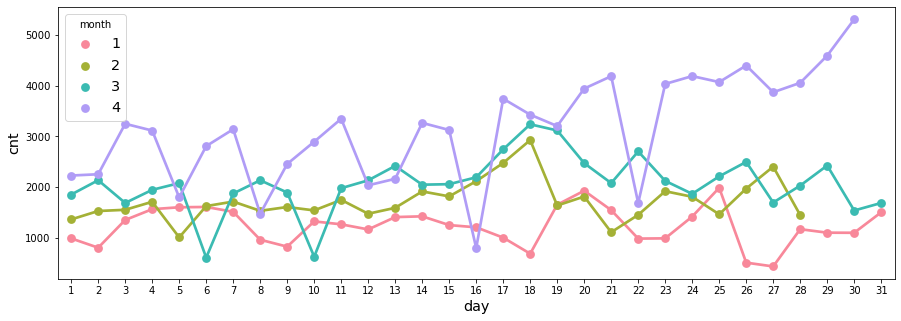

In [15]:
temp=daily.loc[(daily["date"]<"2011-05-01")]
fig,ax=plt.subplots()
#colours=["black","crimson"]
#sns.set_palette(sns.color_palette(colours))
sns.pointplot(data=temp,x="day",y="cnt",hue="month")

[[<matplotlib.axis.XTick at 0x2296d2ef7f0>,

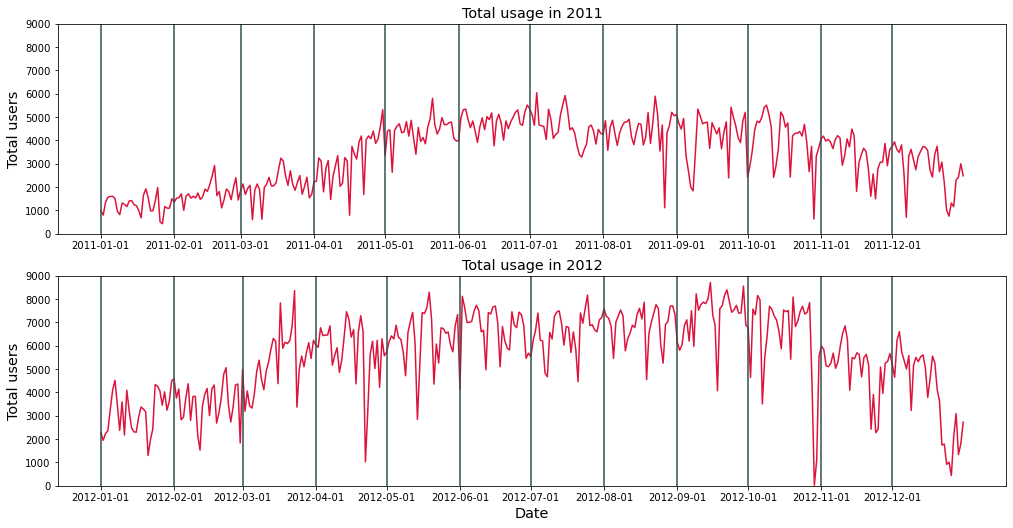

In [16]:
fig,ax=plt.subplots(2,1,figsize=(17,8.5))
temp=daily.loc[(daily["year"]==2011)]
sns.lineplot(ax=ax[0],x=temp["date"],y=temp["cnt"],color="crimson")
temp_labels=temp["date"].loc[(temp["day"]==1)]
for i in range(len(temp_labels)):
    ax[0].axvline(temp_labels.iloc[i],color="darkslategrey")
ax[0].set(title="Total usage in 2011",xlabel="",ylabel="Total users",ylim=(0,9000))
ax[0].set(xticks=temp_labels)
temp=daily.loc[(daily["year"]==2012)]
sns.lineplot(ax=ax[1],x=temp["date"],y=temp["cnt"],color="crimson")
temp_labels=temp["date"].loc[(temp["day"]==1)]
for i in range(len(temp_labels)):
    ax[1].axvline(temp_labels.iloc[i],color="darkslategrey")
ax[1].set(title="Total usage in 2012",xlabel="Date",ylabel="Total users",ylim=(0,9000))
ax[1].set(xticks=temp_labels)

C:\Users\giorg\AppData\Local\Temp/ipykernel_5460/3271705032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["avg"]=(temp["cnt"].rolling(7).sum())
C:\Users\giorg\AppData\Local\Temp/ipykernel_5460/3271705032.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["avg"]=(temp["cnt"].rolling(7).sum())


[[<matplotlib.axis.XTick at 0x229709ac280>,

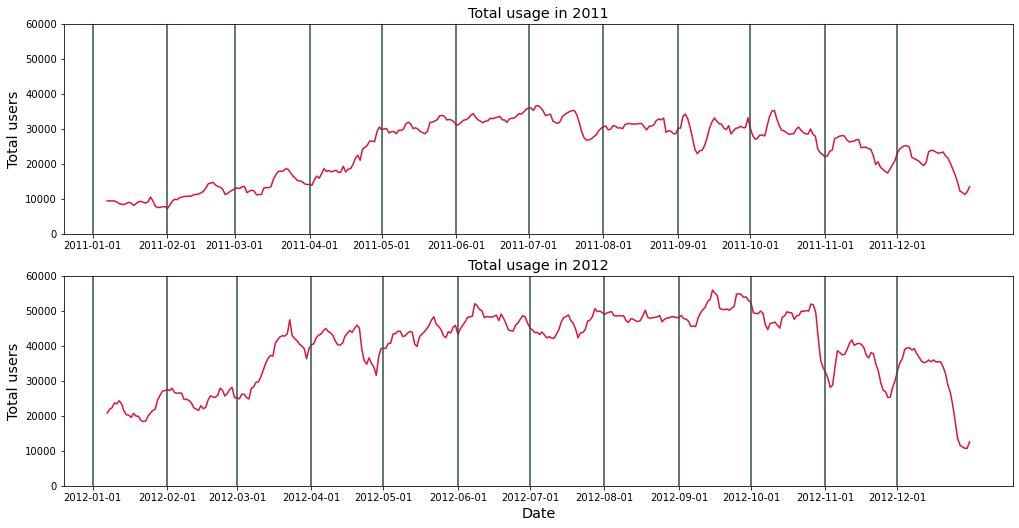

In [17]:
fig,ax=plt.subplots(2,1,figsize=(17,8.5))
temp=daily.loc[(daily["year"]==2011)]
temp["avg"]=(temp["cnt"].rolling(7).sum())
sns.lineplot(ax=ax[0],x=temp["date"],y=temp["avg"],color="crimson")
temp_labels=temp["date"].loc[(temp["day"]==1)]
for i in range(len(temp_labels)):
    ax[0].axvline(temp_labels.iloc[i],color="darkslategrey")
ax[0].set(title="Total usage in 2011",xlabel="",ylabel="Total users",ylim=(0,60000))
ax[0].set(xticks=temp_labels)
temp=daily.loc[(daily["year"]==2012)]
temp["avg"]=(temp["cnt"].rolling(7).sum())
sns.lineplot(ax=ax[1],x=temp["date"],y=temp["avg"],color="crimson")
temp_labels=temp["date"].loc[(temp["day"]==1)]
for i in range(len(temp_labels)):
    ax[1].axvline(temp_labels.iloc[i],color="darkslategrey")
ax[1].set(title="Total usage in 2012",xlabel="Date",ylabel="Total users",ylim=(0,60000))
ax[1].set(xticks=temp_labels)

C:\Users\giorg\AppData\Local\Temp/ipykernel_5460/2446703733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["avg"]=(temp["cnt"].rolling(7).sum())
C:\Users\giorg\AppData\Local\Temp/ipykernel_5460/2446703733.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["avg"]=(temp["cnt"].rolling(7).sum())


[[<matplotlib.axis.XTick at 0x22970e64c40>,

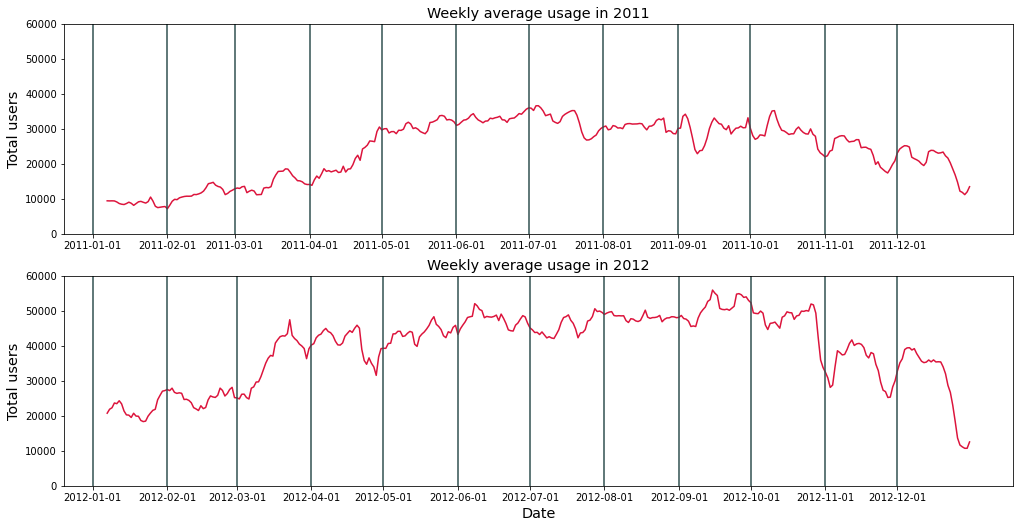

In [18]:
fig,ax=plt.subplots(2,1,figsize=(17,8.5))
temp=daily.loc[(daily["year"]==2011)]
temp["avg"]=(temp["cnt"].rolling(7).sum())
sns.lineplot(ax=ax[0],x=temp["date"],y=temp["avg"],color="crimson")
temp_labels=temp["date"].loc[(temp["day"]==1)]
for i in range(len(temp_labels)):
    ax[0].axvline(temp_labels.iloc[i],color="darkslategrey")
ax[0].set(title="Weekly average usage in 2011",xlabel="",ylabel="Total users",ylim=(0,60000))
ax[0].set(xticks=temp_labels)
temp=daily.loc[(daily["year"]==2012)]
temp["avg"]=(temp["cnt"].rolling(7).sum())
sns.lineplot(ax=ax[1],x=temp["date"],y=temp["avg"],color="crimson")
temp_labels=temp["date"].loc[(temp["day"]==1)]
for i in range(len(temp_labels)):
    ax[1].axvline(temp_labels.iloc[i],color="darkslategrey")
ax[1].set(title="Weekly average usage in 2012",xlabel="Date",ylabel="Total users",ylim=(0,60000))
ax[1].set(xticks=temp_labels)